## New York City (excluding Staten Island) OSMNx Biking Network + Simulation
Author: Callie Clark
Last Updated: 5/21/2024

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import networkx as nx
import osmnx as ox
import json

%matplotlib inline
ox.__version__

from scipy.spatial import cKDTree
from TT_functions import *
import random

In [3]:
G = ox.graph_from_place("New York, New York, USA", network_type="bike") 
G = ox.utils_graph.get_largest_component(G, strongly=True) #Staten Island is not connected to other boroughs with bike/walk

G = ox.add_edge_speeds(G)
G_ = ox.speed.add_edge_travel_times(G, precision=1)

/tmp/ipykernel_61313/3933915618.py:2: FutureWarning: The `get_largest_component` function is deprecated and will be removed in the v2.0.0 release. Replace it with `truncate.largest_component` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.utils_graph.get_largest_component(G, strongly=True) #Staten Island is not connected to other boroughs with bike/walk
/tmp/ipykernel_61313/3933915618.py:5: FutureWarning: The `add_edge_travel_times` function has moved to the `routing` module. Calling `speed.add_edge_travel_times` is deprecated and will be removed in the v2.0.0 release. Call it via `routing.add_edge_travel_times` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G_ = ox.speed.add_edge_travel_times(G, precision=1)
/home/cusp/crc9978/.conda/envs/ox/lib/python3.12/site-packages/osmnx/speed.py:67: FutureWarning: The `precision` parameter is deprecated and will be removed in the v2.0.0 release. See the 

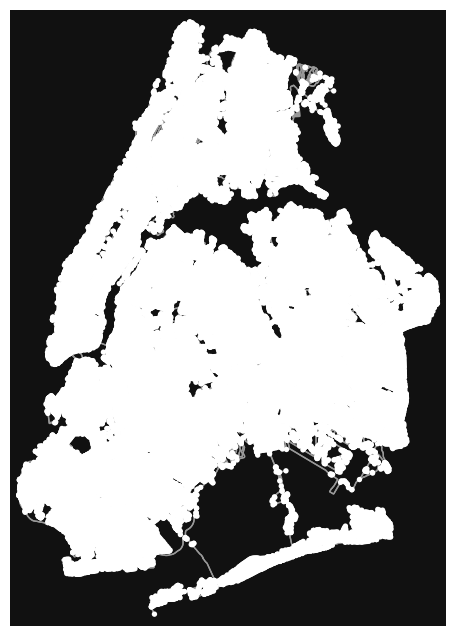

In [4]:
fig, ax = ox.plot_graph(G)


In [5]:
# fig,(ax1)=plt.subplots(ncols=(1),nrows=(1),figsize=(12,12))
# nyc_CT.plot(ax=ax1,alpha=0.3,color='grey',zorder=1,edgecolor='black')
# gdf_nodes[gdf_nodes.index==2317301933].plot(ax=ax1)

In [6]:
gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)
gdf_edges

/tmp/ipykernel_61313/232611469.py:1: FutureWarning: The `graph_to_gdfs` function has moved to the `convert` module. Calling `utils_graph.graph_to_gdfs` is deprecated and will be removed in the v2.0.0 release. Call it via `convert.graph_to_gdfs` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)


osmid                name  \
u           v          key                                                 
42421728    3602679383 0                   195743153   Central Park West   
            3602678205 0        [420625573, 5668966]   West 106th Street   
            42432736   0    [1271523197, 1271523198]   Central Park West   
42421731    42437916   0                     5671485    Manhattan Avenue   
            42432737   0                   195743186    Manhattan Avenue   
...                                              ...                 ...   
11913934549 42909281   0                   587067548       Cooper Avenue   
            42847870   0                   221577888         62nd Street   
11919089004 42916014   0                     5708208  Brinkerhoff Avenue   
            5488154069 0                     5708208  Brinkerhoff Avenue   
            4163728666 0                   346605317   Merrick Boulevard   

                                highway maxspeed  oneway reversed   length  \
u           v          key                                                   
42421728    3602679383 0      secondary   25 mph   False     True   65.891   
            3602678205 0      secondary      NaN   False    False   64.120   
            42432736   0      secondary   25 mph   False    False   86.274   
42421731    42437916   0    residential      NaN   False     True   86.149   
            42432737   0    residential      NaN   False    False   85.968   
...                                 ...      ...     ...      ...      ...   
11913934549 42909281   0      secondary      NaN   False     True   61.399   
            42847870   0    residential      NaN    True    False   85.917   
11919089004 42916014   0    residential      NaN   False    False   10.797   
            5488154069 0    residential      NaN   False     True   35.992   
            4163728666 0        primary      NaN    True    False  101.495   

                                                                     geometry  \
u           v          key                                                      
42421728    3602679383 0    LINESTRING (-73.96004 40.79805, -73.96011 40.7...   
            3602678205 0    LINESTRING (-73.96004 40.79805, -73.96017 40.7...   
            42432736   0    LINESTRING (-73.96004 40.79805, -73.95996 40.7...   
42421731    42437916   0    LINESTRING (-73.96147 40.79865, -73.96154 40.7...   
            42432737   0    LINESTRING (-73.96147 40.79865, -73.96140 40.7...   
...                                                                       ...   
11913934549 42909281   0    LINESTRING (-73.89296 40.69763, -73.89335 40.6...   
            42847870   0    LINESTRING (-73.89296 40.69763, -73.89289 40.6...   
11919089004 42916014   0    LINESTRING (-73.78283 40.69598, -73.78272 40.6...   
            5488154069 0    LINESTRING (-73.78283 40.69598, -73.78291 40.6...   
            4163728666 0    LINESTRING (-73.78283 40.69598, -73.78277 40.6...   

                            speed_kph  travel_time lanes  ref service access  \
u           v          key                                                     
42421728    3602679383 0         40.2          5.9   NaN  NaN     NaN    NaN   
            3602678205 0         41.1          5.6   NaN  NaN     NaN    NaN   
            42432736   0         40.2          7.7   NaN  NaN     NaN    NaN   
42421731    42437916   0         38.7          8.0   NaN  NaN     NaN    NaN   
            42432737   0         38.7          8.0   NaN  NaN     NaN    NaN   
...                               ...          ...   ...  ...     ...    ...   
11913934549 42909281   0         41.1          5.4   NaN  NaN     NaN    NaN   
            42847870   0         38.7          8.0   NaN  NaN     NaN    NaN   
11919089004 42916014   0         38.7          1.0   NaN  NaN     NaN    NaN   
            5488154069 0         38.7          3.3   NaN  NaN     NaN    NaN   
            4163728666 0     

In [7]:
# pass in a few default speed values (km/hour)
# to fill in edges with missing `maxspeed` from OSM
#bike_speeds = {"residential": 26, "secondary": 20, "tertiary": 24,'cycleway':40,'pedestrian':16,'primary':19,'path':40,'service':26}
bike_speeds = {"residential": 16, "secondary": 16, "tertiary": 16,'cycleway':26,'pedestrian':16,'primary':16,'path':26,'service':16}
# G = ox.add_edge_speeds(G, bike_speeds)
# G = ox.add_edge_travel_times(G)

In [8]:
error_count1=0 
edge_count=0
for edge in G.edges:

    
    edge_obj = G[edge[0]][edge[1]][edge[2]]
    road_type=edge_obj['highway']
    
    distance = edge_obj['length']/1000 # Convert from m to km


    
    edge_count+=1

    try:
        urban_tt = distance/(bike_speeds[road_type] /3600) # Convert from mph to kph, hours to minutes    
    except:

        error_count1+=1
        urban_tt = distance/(16 /3600)# minutes 
        #print(road_type)
    G[edge[0]][edge[1]][edge[2]]['urban_tt'] = round(urban_tt,2)
print(error_count1)

6103


In [9]:
gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)
gdf_edges

/tmp/ipykernel_61313/232611469.py:1: FutureWarning: The `graph_to_gdfs` function has moved to the `convert` module. Calling `utils_graph.graph_to_gdfs` is deprecated and will be removed in the v2.0.0 release. Call it via `convert.graph_to_gdfs` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)


osmid                name  \
u           v          key                                                 
42421728    3602679383 0                   195743153   Central Park West   
            3602678205 0        [420625573, 5668966]   West 106th Street   
            42432736   0    [1271523197, 1271523198]   Central Park West   
42421731    42437916   0                     5671485    Manhattan Avenue   
            42432737   0                   195743186    Manhattan Avenue   
...                                              ...                 ...   
11913934549 42909281   0                   587067548       Cooper Avenue   
            42847870   0                   221577888         62nd Street   
11919089004 42916014   0                     5708208  Brinkerhoff Avenue   
            5488154069 0                     5708208  Brinkerhoff Avenue   
            4163728666 0                   346605317   Merrick Boulevard   

                                highway maxspeed  oneway reversed   length  \
u           v          key                                                   
42421728    3602679383 0      secondary   25 mph   False     True   65.891   
            3602678205 0      secondary      NaN   False    False   64.120   
            42432736   0      secondary   25 mph   False    False   86.274   
42421731    42437916   0    residential      NaN   False     True   86.149   
            42432737   0    residential      NaN   False    False   85.968   
...                                 ...      ...     ...      ...      ...   
11913934549 42909281   0      secondary      NaN   False     True   61.399   
            42847870   0    residential      NaN    True    False   85.917   
11919089004 42916014   0    residential      NaN   False    False   10.797   
            5488154069 0    residential      NaN   False     True   35.992   
            4163728666 0        primary      NaN    True    False  101.495   

                                                                     geometry  \
u           v          key                                                      
42421728    3602679383 0    LINESTRING (-73.96004 40.79805, -73.96011 40.7...   
            3602678205 0    LINESTRING (-73.96004 40.79805, -73.96017 40.7...   
            42432736   0    LINESTRING (-73.96004 40.79805, -73.95996 40.7...   
42421731    42437916   0    LINESTRING (-73.96147 40.79865, -73.96154 40.7...   
            42432737   0    LINESTRING (-73.96147 40.79865, -73.96140 40.7...   
...                                                                       ...   
11913934549 42909281   0    LINESTRING (-73.89296 40.69763, -73.89335 40.6...   
            42847870   0    LINESTRING (-73.89296 40.69763, -73.89289 40.6...   
11919089004 42916014   0    LINESTRING (-73.78283 40.69598, -73.78272 40.6...   
            5488154069 0    LINESTRING (-73.78283 40.69598, -73.78291 40.6...   
            4163728666 0    LINESTRING (-73.78283 40.69598, -73.78277 40.6...   

                            speed_kph  travel_time  urban_tt lanes  ref  \
u           v          key                                                
42421728    3602679383 0         40.2          5.9     14.83   NaN  NaN   
            3602678205 0         41.1          5.6     14.43   NaN  NaN   
            42432736   0         40.2          7.7     19.41   NaN  NaN   
42421731    42437916   0         38.7          8.0     19.38   NaN  NaN   
            42432737   0         38.7          8.0     19.34   NaN  NaN   
...                               ...          ...       ...   ...  ...   
11913934549 42909281   0         41.1          5.4     13.81   NaN  NaN   
            42847870   0         38.7          8.0     19.33   NaN  NaN   
11919089004 42916014   0         38.7          1.0      2.43   NaN  NaN   
            5488154069 0         38.7          3.3      8.10   NaN  NaN   
            4163728666 0         41.4          8.8     22.84     2  NaN   

             

In [10]:
nyu_coords=ox.distance.nearest_nodes(G, X=-73.986110, Y=40.694340)
home_coords=ox.distance.nearest_nodes(G, X=-73.956030, Y=40.673720)
PL_coords=ox.distance.nearest_nodes(G, X=-73.980711, Y=40.664211)#40.6645972

# G_drive = ox.add_edge_speeds(G_drive)
# G_drive = ox.add_edge_travel_times(G_drive)

route_drive = ox.shortest_path(G, 42733494, 42757662, weight="urban_tt")

travel_time_drive = nx.shortest_path_length(G, 42733494, 42757662, weight='urban_tt')
#travel_time_drive = ox.distance.shortest_path(G_drive, home_coords, nyu_coords, weight='rush_hour_tt')
travel_time_drive/60

26.274666666666665

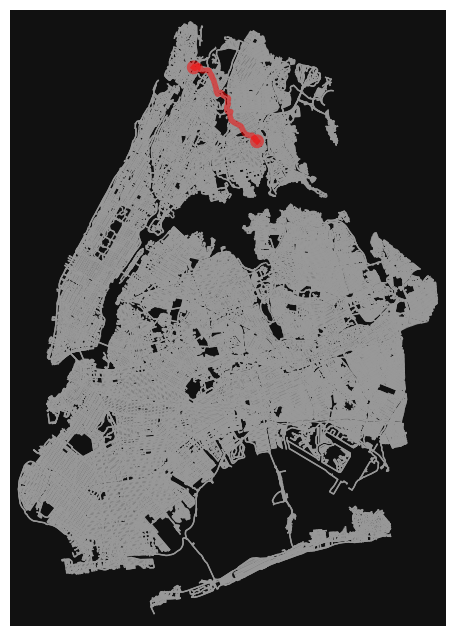

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [11]:
ox.plot_graph_route(G, route_drive, node_size=0)

In [12]:
gdf_nodes

,y,x,highway,street_count,ref,geometry
osmid,,,,,,
42421728,40.798048,-73.960044,traffic_signals,3,NaN,POINT (-73.96004 40.79805)
42421731,40.798654,-73.961474,traffic_signals,4,NaN,POINT (-73.96147 40.79865)
42421737,40.799244,-73.962873,traffic_signals,4,NaN,POINT (-73.96287 40.79924)
42421741,40.800429,-73.965691,traffic_signals,4,NaN,POINT (-73.96569 40.80043)
42421745,40.801398,-73.967996,traffic_signals,4,NaN,POINT (-73.96800 40.80140)
...,...,...,...,...,...,...
11909755124,40.702645,-73.815424,NaN,3,NaN,POINT (-73.81542 40.70265)
11913132827,40.835242,-73.871988,NaN,3,NaN,POINT (-73.87199 40.83524)
11913132830,40.834848,-73.872261,NaN,1,NaN,POINT (-73.87226 40.83485)


# Calculate TT

In [13]:
census_tract=pd.read_csv('geo_files/census_tract_centroid.csv',index_col=0)
census_tract=census_tract[~(census_tract.BoroName=='Staten Island')]
census_tract['node']=ox.distance.nearest_nodes(G, list(census_tract['lon']), list(census_tract['lat']), return_dist=False)
census_tract

,GEOID,BoroName,NTA2020,lon,lat,centroid,node
0,36061000100,Manhattan,MN0191,-74.042340,40.695673,POINT (-74.04233991488555 40.69567298240604),246901366
1,36061000201,Manhattan,MN0301,-73.985848,40.711869,POINT (-73.98584800028144 40.71186871871548),11038072104
2,36061000600,Manhattan,MN0301,-73.989477,40.711951,POINT (-73.9894767752886 40.711950582311424),4487582557
3,36061001401,Manhattan,MN0302,-73.987332,40.715160,POINT (-73.98733213277733 40.715160475095416),7595185930
4,36061001402,Manhattan,MN0302,-73.985882,40.717513,POINT (-73.98588163638996 40.71751329107455),7476387556
...,...,...,...,...,...,...,...
2320,36047066600,Brooklyn,BK1891,-73.916235,40.594024,POINT (-73.91623335169032 40.59402388288404),11386184975
2321,36061002400,Manhattan,MN0303,-73.973678,40.723954,POINT (-73.97367781587977 40.72395420113046),42430945
2322,36047055500,Brooklyn,BK0102,-73.963275,40.718096,POINT (-73.96327467519758 40.718095748390894),42469494
2323,36047017700,Brooklyn,BK5591,-73.968921,40.661600,POINT (-73.96892143815543 40.66159963184397),6579385568


In [14]:
census_tract_csv=census_tract[['GEOID','node']]
census_tract_csv.rename(columns={'node':'bike_node'},inplace=True)
census_tract_csv.set_index(keys='GEOID',inplace=True)
# census_tract_csv.to_csv('node_data/CT_nodes_bike_4b.csv')

/tmp/ipykernel_61313/2946492595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_tract_csv.rename(columns={'node':'bike_node'},inplace=True)


In [15]:
#generates dictionary wuth node to borough info
node_county_dict=dict(zip(census_tract['node'],census_tract['BoroName']))

# # write the dictionary to the file in JSON format
# with open('node_data/bike_node_county_map_4b.json', 'w') as f:
#     # write the dictionary to the file in JSON format
#     json.dump(node_county_dict, f)

In [16]:
#import FP location data and assign nearest node in OSMNx
fp_df=gpd.read_file("FP_data/food_pantry_schedule_final.geojson",index_col=0)
fp_df=fp_df[~(fp_df.BoroName=='Staten Island')]
fp_df['node']=ox.distance.nearest_nodes(G, list(fp_df['lng']), list(fp_df['lat']), return_dist=False)
fp_df_csv=fp_df[['id','node']]
fp_df_csv.rename(columns={'node':'bike_node'},inplace=True)
fp_df_csv.set_index(keys='id',inplace=True)
fp_node_map=dict(zip(fp_df_csv['bike_node'],fp_df_csv.index))
#fp_df_csv.to_csv('node_data/fp_nodes_bike_4b.csv')

/tmp/ipykernel_61313/2604351163.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp_df_csv.rename(columns={'node':'bike_node'},inplace=True)


In [17]:
CT_gpd = gpd.GeoDataFrame(
    census_tract, geometry=gpd.points_from_xy(census_tract.lon, census_tract.lat))
CT_gpd.set_crs('4326',inplace=True)

,GEOID,BoroName,NTA2020,lon,lat,centroid,node,geometry
0,36061000100,Manhattan,MN0191,-74.042340,40.695673,POINT (-74.04233991488555 40.69567298240604),246901366,POINT (-74.04234 40.69567)
1,36061000201,Manhattan,MN0301,-73.985848,40.711869,POINT (-73.98584800028144 40.71186871871548),11038072104,POINT (-73.98585 40.71187)
2,36061000600,Manhattan,MN0301,-73.989477,40.711951,POINT (-73.9894767752886 40.711950582311424),4487582557,POINT (-73.98948 40.71195)
3,36061001401,Manhattan,MN0302,-73.987332,40.715160,POINT (-73.98733213277733 40.715160475095416),7595185930,POINT (-73.98733 40.71516)
4,36061001402,Manhattan,MN0302,-73.985882,40.717513,POINT (-73.98588163638996 40.71751329107455),7476387556,POINT (-73.98588 40.71751)
...,...,...,...,...,...,...,...,...
2320,36047066600,Brooklyn,BK1891,-73.916235,40.594024,POINT (-73.91623335169032 40.59402388288404),11386184975,POINT (-73.91624 40.59402)
2321,36061002400,Manhattan,MN0303,-73.973678,40.723954,POINT (-73.97367781587977 40.72395420113046),42430945,POINT (-73.97368 40.72395)
2322,36047055500,Brooklyn,BK0102,-73.963275,40.718096,POINT (-73.96327467519758 40.718095748390894),42469494,POINT (-73.96327 40.71810)
2323,36047017700,Brooklyn,BK5591,-73.968921,40.661600,POINT (-73.96892143815543 40.66159963184397),6579385568,POINT (-73.96892 40.66160)


In [18]:

df_tt=make_tt_df(G,gdf_nodes,fp_df,CT_gpd,node_county_dict,mode='Bike',k_nearest=25)
df_tt

Process ForkPoolWorker-49:
Process ForkPoolWorker-42:


KeyboardInterrupt: 

In [ ]:
df_tt_=census_tract_csv.merge(df_tt,left_on='bike_node',right_index=True).drop(columns=['bike_node'])
#maps FP nodes to FP IDs
for col in [i for i in df_tt_.columns if 'nearest' in i]:
    df_tt_[col]=df_tt_[col].map(fp_node_map)
    
for col in [i for i in df_tt_.columns if 'tt' in i]:
    df_tt_[col]=df_tt_[col].astype('float')
    
df_tt_.to_csv('travel_time_df/df_tt_bike_4b_k25.csv')


## Combine DF

In [5]:
df_tt_4=pd.read_csv('travel_time_df/df_tt_bike_4b_k10.csv',index_col=0)
df_tt_1=pd.read_csv('travel_time_df/df_tt_bike_richmond_k10.csv',index_col=0)
df_tt_5=pd.concat([df_tt_4,df_tt_1])
df_tt_5.to_csv('travel_time_df/df_tt_bike_k10.csv')